Импортируем необходимые библиотеки и датасет

In [256]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFE

In [227]:
from sklearn.datasets import fetch_covtype
fetch_covtype = fetch_covtype(as_frame = True).frame

In [228]:
fetch_covtype.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


Изучим датасет, проверим наличие пустых значений, наличие выбросов

In [10]:
# Общая информация
fetch_covtype.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  float64
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  float64
 4   Vertical_Distance_To_Hydrology      581012 non-null  float64
 5   Horizontal_Distance_To_Roadways     581012 non-null  float64
 6   Hillshade_9am                       581012 non-null  float64
 7   Hillshade_Noon                      581012 non-null  float64
 8   Hillshade_3pm                       581012 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 10  Wilderness_Area_0                   581012 non-null  float64
 11  Wilderness_Area_1         

In [9]:
# Определяем количество пропусков для каждого признака
fetch_covtype.isna().sum().sort_values(ascending=False).head()

Elevation       0
Soil_Type_27    0
Soil_Type_16    0
Soil_Type_17    0
Soil_Type_18    0
dtype: int64

In [11]:
# Посмотрим общую статистику, общее понимание о наличии выбросов
fetch_covtype.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


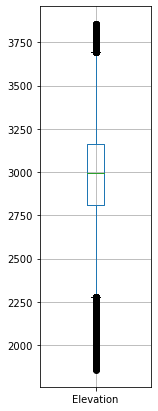

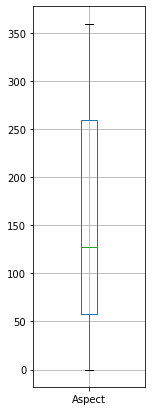

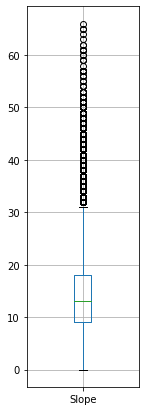

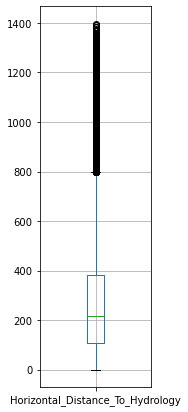

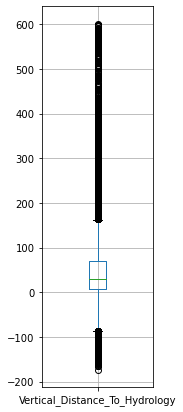

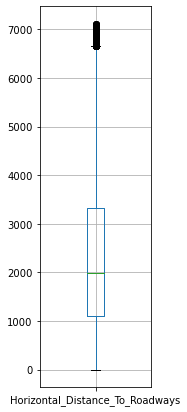

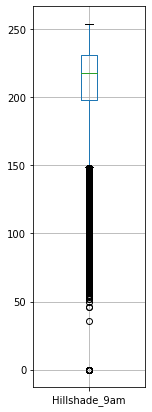

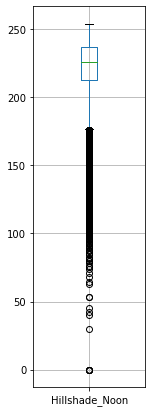

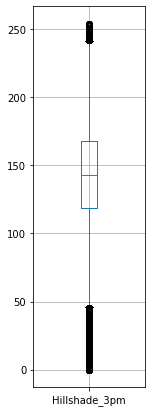

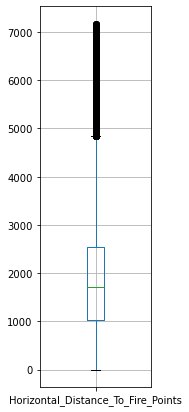

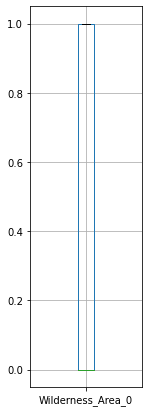

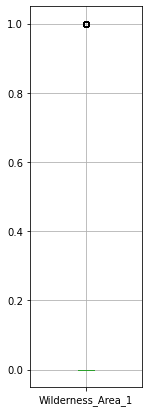

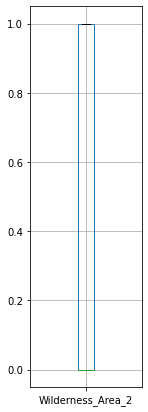

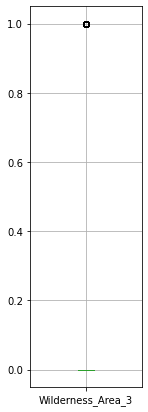

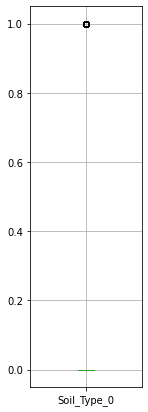

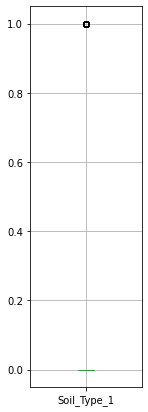

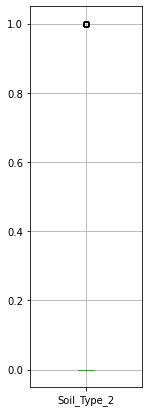

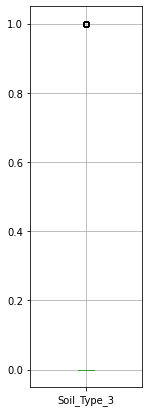

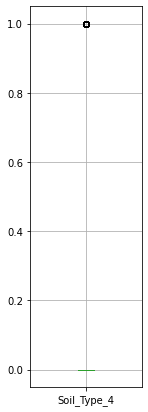

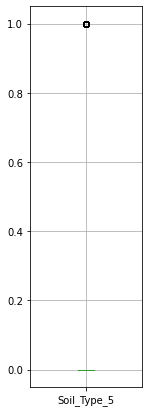

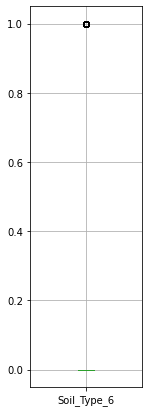

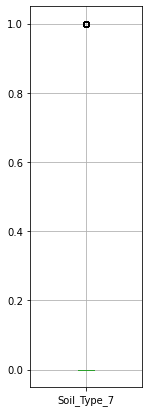

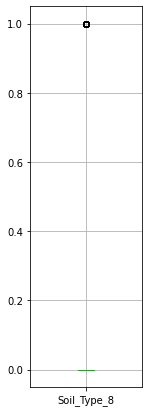

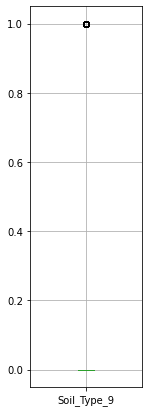

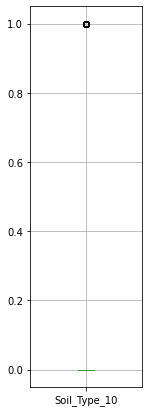

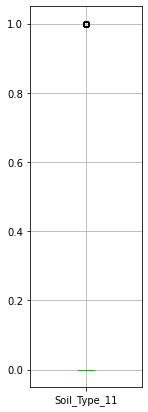

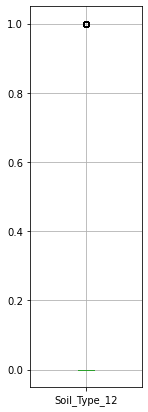

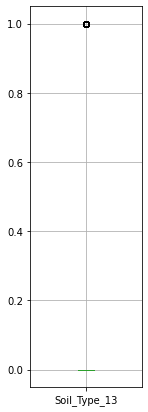

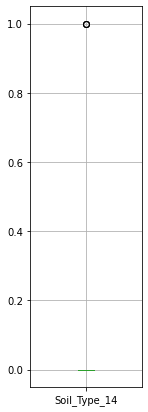

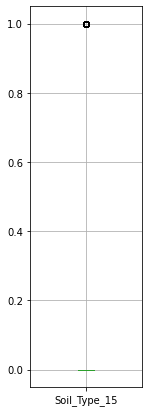

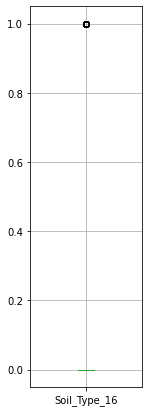

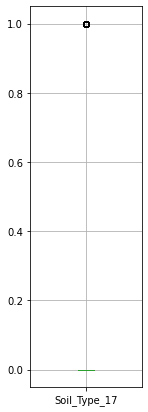

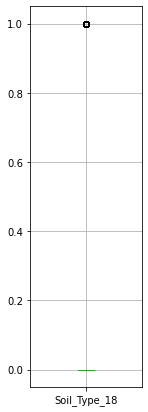

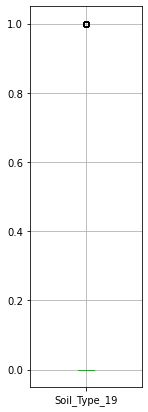

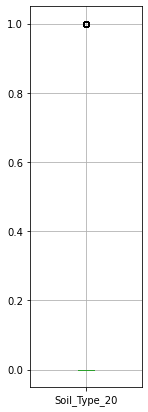

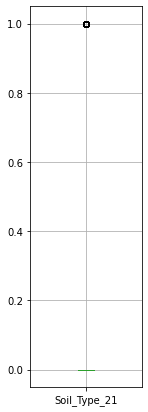

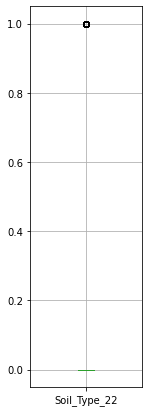

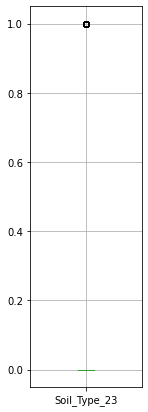

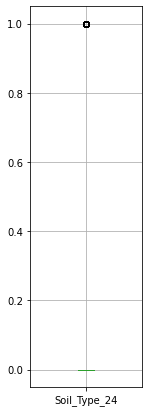

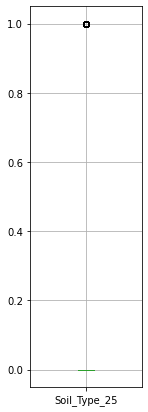

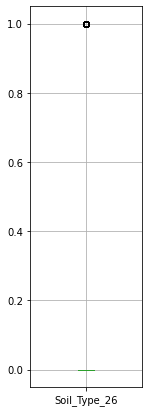

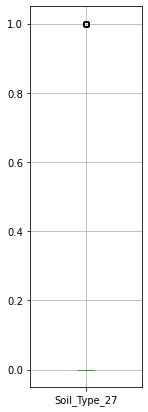

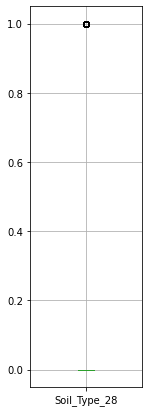

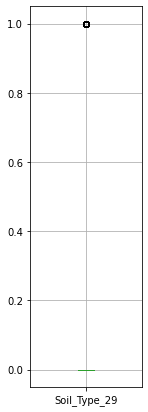

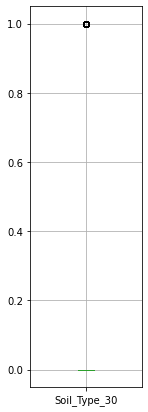

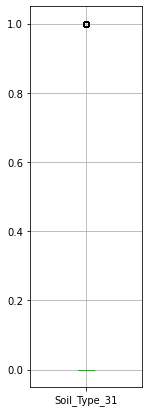

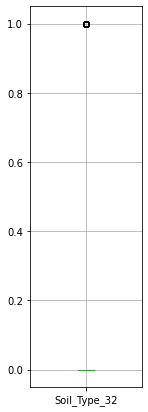

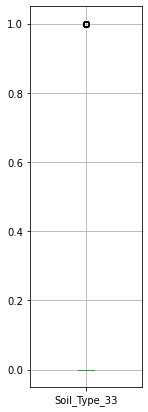

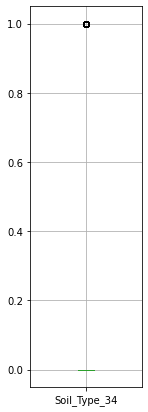

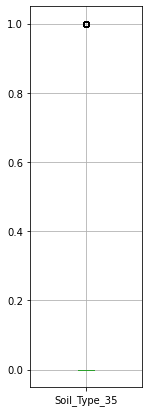

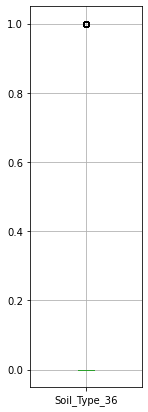

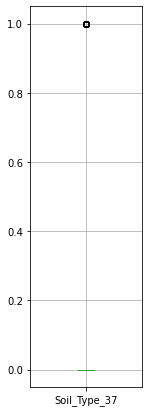

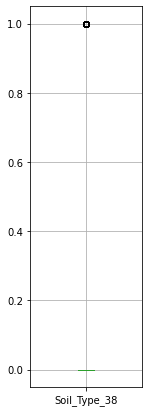

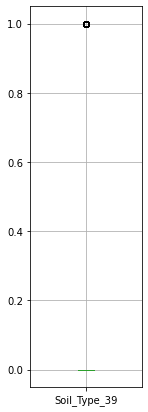

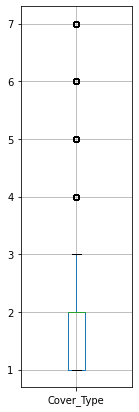

In [55]:
# Проверим наличие выбросов по ящикам с усами
for i in fetch_covtype.columns:
    fetch_covtype.boxplot(column=[i], figsize = (2, 7))
    plt.show()

Некоторые максимумы значительно больше 75% квантиля, что подтверждается и на боксплотах

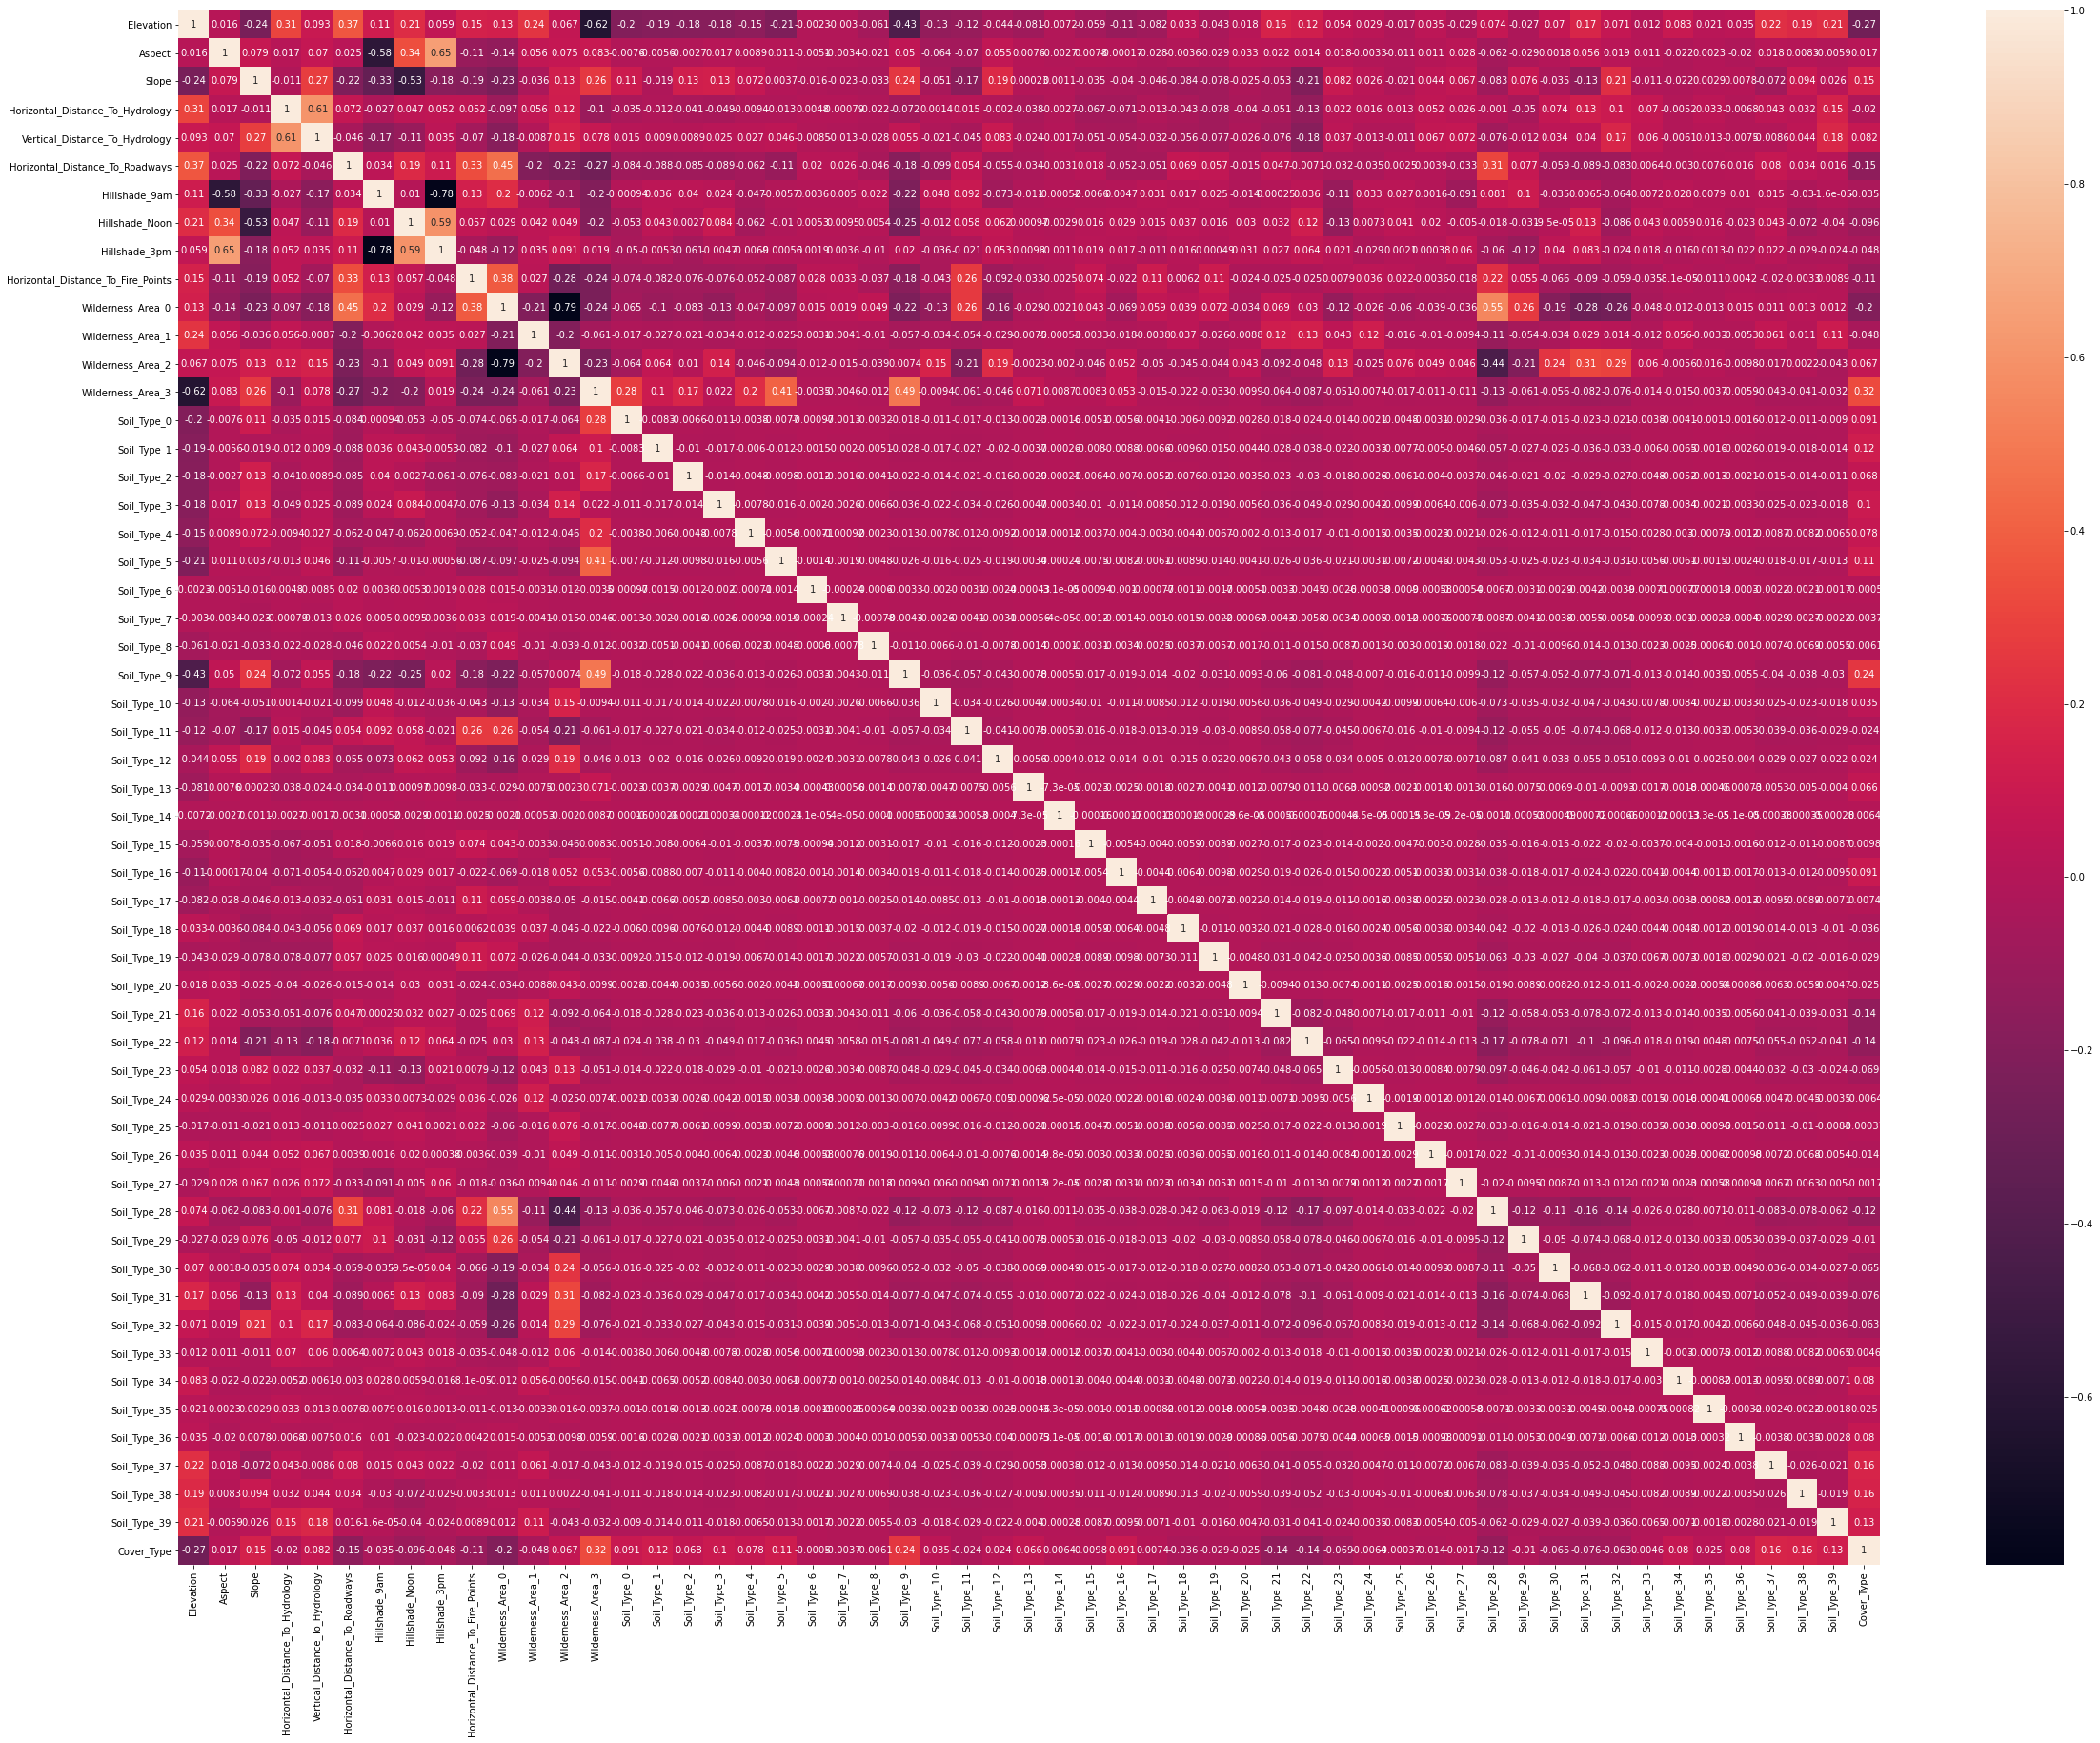

In [69]:
# Построим матрицу корреляции
plt.figure(figsize=(40,30))
sns.heatmap(fetch_covtype.corr(), annot=True)
plt.show()

Выраженная корреляция между какими-либо входящими признаками отсутствует

#### Обучим модель на количестве признаков от одного до максимально возможного

In [92]:
y = fetch_covtype.Cover_Type

In [232]:
# Цикл для линейной регрессии
for i in range(1,54):
    X_train, X_test, y_train, y_test = train_test_split(fetch_covtype.iloc[:, :i], y, test_size = 0.3, random_state = 42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    print(model.score(X_test, y_test))

0.07492833059692416
0.07531194661217144
0.08189269151307399
0.08531842733617157
0.08838081222388727
0.09061023603336549
0.09282843417508002
0.09289771003691971
0.09296071737359213
0.0950610144162577
0.11412021319735566
0.11423839389222745
0.1402316115381691
0.1402316115381691
0.14030401434199014
0.1440398149343658
0.14410353870157788
0.14698984366946033
0.14715576856868318
0.1473031848935451
0.1473108954074802
0.14731093420175323
0.14730652208897044
0.15603558455141808
0.156758855561966
0.15728630157674772
0.157940961800224
0.1612673456134841
0.1612949586144099
0.16173519295406125
0.1692289133255267
0.16966471514404857
0.1699502019050646
0.169948437258854
0.1704059930930486
0.1789693265136757
0.18646231825731263
0.19046855507784677
0.19054929968406165
0.19054942284235588
0.19072560942488226
0.19072888132697674
0.19500470701844808
0.19523657799276528
0.20204913586781548
0.22528101053463734
0.3061905251866013
0.312157382965381
0.3124185755273555
0.3124380889243661
0.3163501933722428
0.31

Очевидно, что модель линейной регрессии для проведения мультиклассовой классификации не подходит.  
Логарифмическая регрессия делается довольно продолжительное время и постоянно жалуется на превышение лимита итераций.  
Поэтому попробуем дерево решений:

In [133]:
# Цикл для дерева решений
for i in range(1,54):
    X_train, X_test, y_train, y_test = train_test_split(fetch_covtype.iloc[:, :i], y, test_size = 0.3, random_state = 42)
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    print(model.score(X_test, y_test))

0.6717975491096017
0.5893496420047732
0.5967505048650633
0.6782862125940885
0.7371029924729209
0.8609555718744263
0.859848310996879
0.8556717000183587
0.8553504222507803
0.9143450523223793
0.921086148338535
0.921923765375436
0.9229048099871489
0.9234613089774187
0.9236104736552231
0.9241210758215531
0.9245743069579585
0.9257905727923628
0.9257561501744079
0.9263126491646778
0.9259340003671745
0.9256987791444832
0.9257676243803928
0.9263700201946026
0.9270986322746466
0.9273682761152928
0.9277813475307509
0.927855929869653
0.9277813475307509
0.9277182393978337
0.9274371213512025
0.9280337800624197
0.927649394161924
0.9278387185606756
0.9284927483018175
0.9270699467596842
0.9293819992656508
0.9303515696713788
0.9302483018175143
0.9298868643289885
0.9302769873324765
0.931034284927483
0.9318432164494217
0.932198916834955
0.9323595557187443
0.9343273820451625
0.9345683403708464
0.9340806866164861
0.9344765467229668
0.9344708096199743
0.9345453919588764
0.9347806131815678
0.934006104277584


Максимальная точность составила 0.93478 при 53 признаках.  
#### Отбор по величине корреляции:

In [138]:
# Отсортируем признаки по уменьшению корреляции
corr['Cover_Type'].sort_values(ascending=False)

Cover_Type                            1.000000
Wilderness_Area_3                     0.323200
Soil_Type_9                           0.243876
Soil_Type_37                          0.160170
Soil_Type_38                          0.155668
Slope                                 0.148285
Soil_Type_39                          0.128351
Soil_Type_1                           0.118135
Soil_Type_5                           0.112958
Soil_Type_3                           0.099672
Soil_Type_0                           0.090828
Soil_Type_16                          0.090582
Vertical_Distance_To_Hydrology        0.081664
Soil_Type_34                          0.080315
Soil_Type_36                          0.080271
Soil_Type_4                           0.077890
Soil_Type_2                           0.068064
Wilderness_Area_2                     0.066846
Soil_Type_13                          0.065562
Soil_Type_10                          0.035379
Soil_Type_35                          0.025397
Soil_Type_12 

In [140]:
# на основе 5 наиболее коррелируемых признаков
X = fetch_covtype[['Wilderness_Area_3', 'Soil_Type_9', 'Soil_Type_37', 'Soil_Type_38', 'Slope']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5457132366440243

In [141]:
# на основе 5 наиболее коррелируемых признаков и 5 наиболее отрицательно коррелируемых признаков
X = fetch_covtype[['Wilderness_Area_3', 'Soil_Type_9', 'Soil_Type_37', 'Soil_Type_38', 'Slope', 'Soil_Type_22', 'Soil_Type_21', 'Horizontal_Distance_To_Roadways', 'Wilderness_Area_0', 'Elevation']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7559837984211493

Полученная точность при 10 признаках составляет 75,6%, при 5 наиболее коррелируемых признаках точность мала - 54,6%.

#### Oтбор признаков на основе Information Value

In [222]:
array = df.values
X = array[:, 0:54]
y = array[:, 54]

In [223]:
mutual_score = mutual_info_classif(X, y, random_state=42)

In [224]:
for i in range(len(df.columns)-1):
    print(f"{df.columns[i]}\t- {mutual_score[i]:.6f}")

Elevation	- 0.457676
Aspect	- 0.020221
Slope	- 0.038648
Horizontal_Distance_To_Hydrology	- 0.024691
Vertical_Distance_To_Hydrology	- 0.018898
Horizontal_Distance_To_Roadways	- 0.089180
Hillshade_9am	- 0.031489
Hillshade_Noon	- 0.022842
Hillshade_3pm	- 0.022883
Horizontal_Distance_To_Fire_Points	- 0.069493
Wilderness_Area_0	- 0.079245
Wilderness_Area_1	- 0.015368
Wilderness_Area_2	- 0.018647
Wilderness_Area_3	- 0.145996
Soil_Type_0	- 0.011154
Soil_Type_1	- 0.023050
Soil_Type_2	- 0.013311
Soil_Type_3	- 0.027407
Soil_Type_4	- 0.007599
Soil_Type_5	- 0.019945
Soil_Type_6	- 0.000154
Soil_Type_7	- 0.000000
Soil_Type_8	- 0.000000
Soil_Type_9	- 0.064588
Soil_Type_10	- 0.007159
Soil_Type_11	- 0.023574
Soil_Type_12	- 0.009473
Soil_Type_13	- 0.002800
Soil_Type_14	- 0.000550
Soil_Type_15	- 0.000000
Soil_Type_16	- 0.007466
Soil_Type_17	- 0.002416
Soil_Type_18	- 0.001103
Soil_Type_19	- 0.001192
Soil_Type_20	- 0.001987
Soil_Type_21	- 0.023782
Soil_Type_22	- 0.021804
Soil_Type_23	- 0.005691
Soil_Type_2

In [230]:
X_mutual = fetch_covtype[['Elevation', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_0', 'Wilderness_Area_3', 'Soil_Type_9']]

In [231]:
model = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X_mutual, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8590451165779328

При отборе признаков на основе Information Value, получился довольно хороший результат 86%

#### Отбор признаков на основе feature_impotance от алгоритма RandomForest

In [236]:
x = fetch_covtype.iloc[:, :-1]

In [239]:
RFR_model = RandomForestRegressor()
RFR_model.fit(x, y)

RandomForestRegressor()

In [ ]:
for i in range(len(df.columns)-1):
    print(f"{df.columns[i]}\t- {model.feature_importances_[i]:.6f}")

In [244]:
# Обучим модель на 10 признаках
important = pd.Series(RFR_model.feature_importances_)
important.index = pd.Series(x.columns)
important.head(10)

Elevation                             0.332633
Aspect                                0.029986
Slope                                 0.015418
Horizontal_Distance_To_Hydrology      0.045668
Vertical_Distance_To_Hydrology        0.043357
Horizontal_Distance_To_Roadways       0.132987
Hillshade_9am                         0.026384
Hillshade_Noon                        0.024024
Hillshade_3pm                         0.024174
Horizontal_Distance_To_Fire_Points    0.138863
dtype: float64

In [246]:
X_random_forest = fetch_covtype[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']]

In [247]:
model = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X_random_forest, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9138459243620342

При отборе признаков на основе feature_impotance от алгоритма RandomForest результат составил 91,4% (при 10 признаках).

#### Жадный отбор признаков по максимальному нарастанию качества модели

In [249]:
model = DecisionTreeClassifier()

In [250]:
sfs = SequentialFeatureSelector(model, n_features_to_select=10)
sfs.fit(x, y)

SequentialFeatureSelector(estimator=DecisionTreeClassifier(),
                          n_features_to_select=10)

In [251]:
cols = sfs.get_support(indices = True)
sfs_features = df.iloc[:,cols]
sfs_features.columns

Index(['Elevation', 'Soil_Type_0', 'Soil_Type_1', 'Soil_Type_3',
       'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_21', 'Soil_Type_36',
       'Soil_Type_37', 'Soil_Type_38'],
      dtype='object')

In [253]:
X_sfs = fetch_covtype[['Elevation', 'Soil_Type_0', 'Soil_Type_1', 'Soil_Type_3',
       'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_21', 'Soil_Type_36',
       'Soil_Type_37', 'Soil_Type_38']]

In [254]:
model = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X_sfs, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6924798053974665

При отборе признаков по максимальному нарастанию качества модели результат составил 69% (при 10 признаках).

#### Жадное отбрасывание признаков по минимальному падению качества модели

In [255]:
model = DecisionTreeClassifier()

In [257]:
RFE_selector = RFE(model, n_features_to_select=10, step=1)
RFE_selector.fit(x, y)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)

In [259]:
colsRFE = RFE_selector.get_support(indices = True)
RFE_features = df.iloc[:,colsRFE]
RFE_features.columns

Index(['Elevation', 'Aspect', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_2'],
      dtype='object')

In [260]:
X_RFE = fetch_covtype[['Elevation', 'Aspect', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_2']]

In [261]:
model = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X_RFE, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9231916651367725

При отборе признаков по отбрасыванию по минимальному падению результат составил 92% (при 10 признаках).  
Вывод: лучший результат показал метод классификации с помощью дерева решений, при этом он значительно менее ресурсозатратный.